In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.stats import ttest_ind
from matplotlib.figure import Figure

t3asmall = pickle.load( open( 't3asmall.pkl', "rb" ) )
t2small = pickle.load(open('t2small.pkl', 'rb'))


In [2]:
t3asmall_df = pd.DataFrame(t3asmall)
t2small_df  = pd.DataFrame(t2small)

| Instance Type | Processor | L1d cache | L2 cache | L3 cache |
| --- | --- | --- |--- | --- |
| t2.small | Intel Xeon E5-2676 | 12 x 32 KB |12 x 256 KB |30 MB|
| t3a.small | AMD EPYC 7571 | 32 x 32 KB |	32 x 512 KB |8 x 8 MB|

The effecticve cahce size of t2.small instance is ~33MB.

The effecticve cahce size of t3a.small instance is ~80MB

In [3]:
m_legend = ['0MB', '10MB', '20MB', '30MB', '40MB', '50MB', '60MB', '70MB', '80MB', '90MB']

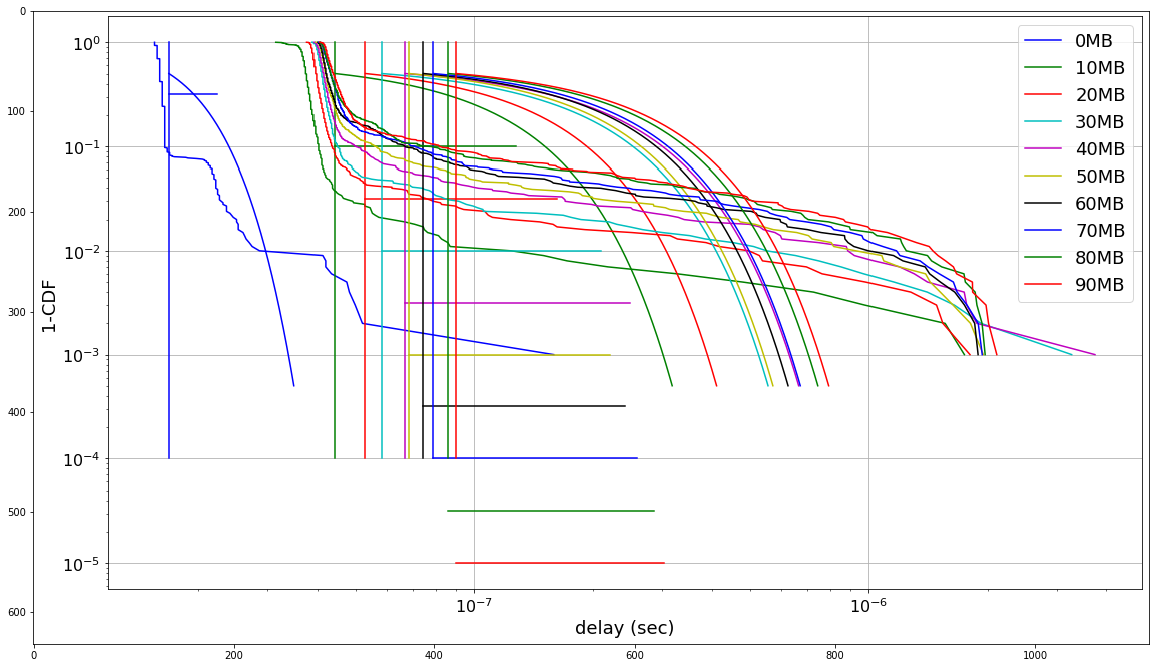

In [4]:
image = mpimg.imread("t3a.png")
plt.figure(figsize=(20,13))
plt.imshow(image)
plt.show()

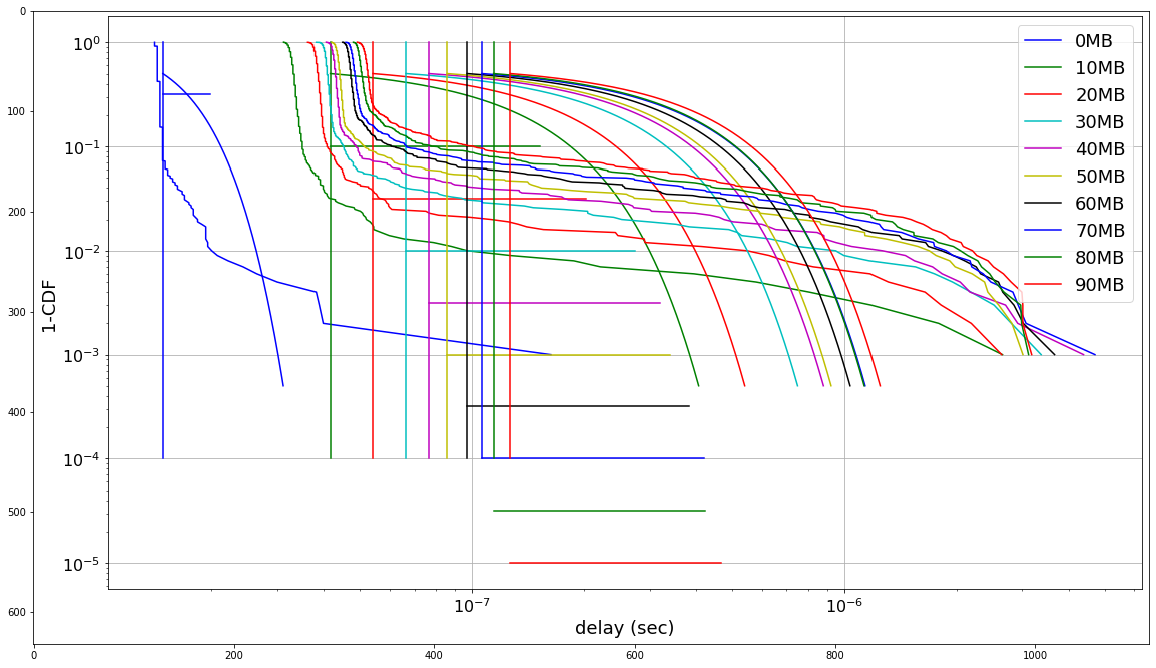

In [5]:
image = mpimg.imread("t2.png")
plt.figure(figsize=(20,13))
plt.imshow(image)
plt.show()

In [6]:
t3asmall_df.head()

,m_i,m,memory__mean,memory__std,memory_latencies
0,0,1,1.685405e-08,5.504783e-09,"[1.5497207641601563e-08, 1.5497207641601563e-0..."
1,1,10000000,4.430246e-08,8.310980e-08,"[3.147125244140625e-08, 3.1709671020507814e-08..."
2,2,20000000,5.288959e-08,1.091091e-07,"[3.7670135498046875e-08, 3.790855407714844e-08..."
3,3,30000000,5.822659e-08,1.513713e-07,"[3.886222839355469e-08, 3.886222839355469e-08,..."
4,4,40000000,6.662321e-08,1.819778e-07,"[3.9339065551757814e-08, 3.9339065551757814e-0..."


In [7]:
t2small_df.head()

,m_i,m,memory__mean,memory__std,memory_latencies
0,0,1,1.480818e-08,4.974807e-09,"[1.4066696166992187e-08, 1.4066696166992187e-0..."
1,1,10000000,4.158306e-08,1.108636e-07,"[3.123283386230469e-08, 3.123283386230469e-08,..."
2,2,20000000,5.409956e-08,1.477794e-07,"[3.62396240234375e-08, 3.647804260253906e-08, ..."
3,3,30000000,6.635499e-08,2.075150e-07,"[3.814697265625e-08, 3.8623809814453126e-08, 3..."
4,4,40000000,7.642007e-08,2.439618e-07,"[4.053115844726563e-08, 4.053115844726563e-08,..."


In [8]:

for idx in range(0, 10):
    t3 = t3asmall_df.loc[idx, 'memory_latencies']
    t2 = t2small_df.loc[idx, 'memory_latencies']
    print('t-test for {}0MB'.format(idx))
    print(ttest_ind(t3, t2))

t-test for 00MB
Ttest_indResult(statistic=8.715188670543206, pvalue=5.979098166289906e-18)
t-test for 10MB
Ttest_indResult(statistic=0.6203383052222069, pvalue=0.5351058276619569)
t-test for 20MB
Ttest_indResult(statistic=-0.20819176098143696, pvalue=0.8351004609545761)
t-test for 30MB
Ttest_indResult(statistic=-1.0002208838885052, pvalue=0.3173247428554567)
t-test for 40MB
Ttest_indResult(statistic=-1.0173865814162821, pvalue=0.30909274067238474)
t-test for 50MB
Ttest_indResult(statistic=-1.8625586578953108, pvalue=0.06267105769189524)
t-test for 60MB
Ttest_indResult(statistic=-2.1669210167912007, pvalue=0.030358703917979624)
t-test for 70MB
Ttest_indResult(statistic=-2.4062578203510343, pvalue=0.01620717247610227)
t-test for 80MB
Ttest_indResult(statistic=-2.422890259943754, pvalue=0.015485945923862609)
t-test for 90MB
Ttest_indResult(statistic=-2.8997619130330112, pvalue=0.0037752431570886626)


 - The p-test for the case of 10, 20, 30, 40, 50MB is greater than 0.05 and for the rest of the block sizes we can reject the Null hypothesis in the favor of out Alternative hypothesis.
 - Our hypotheis is correct because when the block size becomes considerably larger the L3 cache size of the t2.small instance but is still smaller than the L3 cache size of t3a.small, than the t3a.small performs better than t2.small.

In [9]:
t3asmall_df['memory_min'] = t3asmall_df['memory_latencies'].apply(lambda x: min(x))
t3asmall_df['memory_max'] = t3asmall_df['memory_latencies'].apply(lambda x: max(x))
t2small_df['memory_min'] = t2small_df['memory_latencies'].apply(lambda x: min(x))
t2small_df['memory_max'] = t2small_df['memory_latencies'].apply(lambda x: max(x))

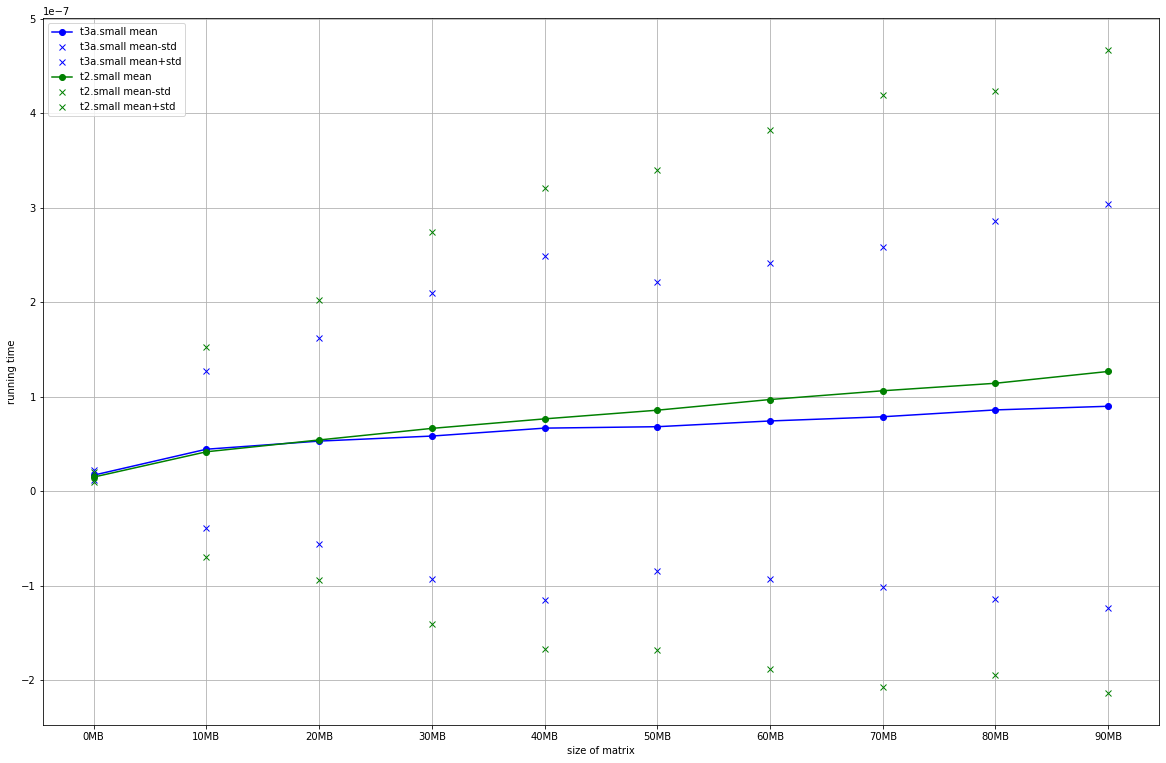

In [10]:
plt.figure(figsize=(20,13))
plt.plot(m_legend, t3asmall_df['memory__mean'],'o-b',label='t3a.small mean')
plt.plot(m_legend,t3asmall_df['memory__mean']-t3asmall_df['memory__std'],'xb',label='t3a.small mean-std')
plt.plot(m_legend,t3asmall_df['memory__mean']+t3asmall_df['memory__std'],'xb',label='t3a.small mean+std')
plt.plot(m_legend, t2small_df['memory__mean'],'o-g',label='t2.small mean')
plt.plot(m_legend,t2small_df['memory__mean']-t2small_df['memory__std'],'xg',label='t2.small mean-std')
plt.plot(m_legend,t2small_df['memory__mean']+t2small_df['memory__std'],'xg',label='t2.small mean+std')
plt.xlabel('size of matrix')
plt.ylabel('running time')
plt.legend()
plt.grid()